In [1]:
import random
import torch

from utils.Logger import showPlot
from utils.Timer import asMinutes, timeSince

%load_ext autoreload
from data.example_Data import Lang, prepareData
from model.seq2seq_Model import (
    Seq2Seq_GRU_Attn_ptModel, 
    Seq2SeqTranslate_ptTokenizer,
)
from baseline_ExpTrain import example_ExpTrain
%autoreload

In [2]:
DATA_DIR = '_data_example'

## load data

In [3]:
if False:
    %cd  $DATA_DIR

    !wget https://download.pytorch.org/tutorial/data.zip -O data.zip
    !unzip -o data.zip

    !ls
    %cd  ../

## setup Experiment

In [4]:
hidden_size = 256

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## setup Data

In [5]:
## Data
input_lang, output_lang, pairs = prepareData(
        'eng', 'fra', f'{DATA_DIR}/data', False)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 95170 sentence pairs
Counting words...
Counted words:
eng 10025
fra 16813
['honesty pays in the long run .', 'l honnetete paye a long terme .']


## setup Model

In [6]:
## Model
tokenizer = Seq2SeqTranslate_ptTokenizer(
                input_lang, output_lang, device)
seq2seq_model = Seq2Seq_GRU_Attn_ptModel(
                input_lang.n_words, output_lang.n_words, hidden_size,
                tokenizer, device, dropout_p=0.1)

## setup exec

100%|██████████| 75/75 [00:13<00:00,  5.53it/s]
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

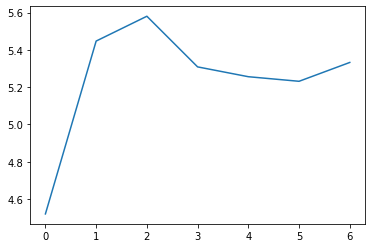

In [8]:
exp_train = example_ExpTrain(pairs)
# test
exp_train.exec(seq2seq_model, 75,
                print_every=1000, plot_every=10, 
                learning_rate=0.01, log_dir='_logs')
# 本実験
# exp_train.exec(seq2seq_model, 75000,
#                 print_every=5000, plot_every=1000, 
#                 learning_rate=0.01, log_dir='_logs')

___

## evaluate
- random print
- Acc
- BLEU などの 評価指標

In [7]:
%load_ext autoreload
from baseline_ExpEval import eval_print_randomly
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
eval_print_randomly(seq2seq_model, pairs)

> these aren t my keys .
= ce ne sont pas mes cles .
< il est est pas pas pas pas ? 

> we re as good as dead now .
= nous sommes desormais pour ainsi dire mortes .
< il est est pas pas pas ? 

> i know the truth .
= je connais la verite .
< il est est pas pas . 

> is there a zoo in boston ?
= y a t il un zoo a boston ?
< il est est pas pas ? 

> we re not doing anything .
= nous ne faisons rien .
< il est est pas pas pas ? 

> how do you handle stress ?
= comment geres tu le stress ?
< il est est pas ? 

> what are you crunching on ?
= qu est ce que tu croques ?
< il est est pas ? 

> your suggestion is of no practical use .
= votre suggestion n est d aucune utilite pratique .
< il est est pas pas pas pas ? 

> you re not fat .
= tu n es pas gros .
< il est est pas pas . 

> they released the prisoner .
= ils relacherent la prisonniere .
< il est est pas pas . 

